#  Chapter 4 从单变量线性回归开始

现在的数据挖掘与机器学习平台能提供很多便利的操作，如果过于依赖学习包，则很难理解机器的学习是如何工作的，因此我们还是需要掌握算法的基本框架和原理。我们的第一个算法是利用numpy等来实现一个单变量线性回归，这个算法可以覆盖机器学习的所有过程和步骤，最主要的是理解梯度下降算法。

## 一个例子
假如你在有一套房（1250平米），需要把它卖掉，能卖多少钱，如何估算？

![房价](img/house.png)

通常的做法：  
* Step 1：收集大量成交的房子的数据（`训练集`）
* Step 2：假设一个房子面积与价格的函数（`假设/模型`）
* Step 3：利用收集的数据解答出函数中的参数(`训练`)
* Step 4：将你的房子面积带入到求解到函数中，计算出价格（`预测`）

一种可能的预测结果是：


![房价预测](img/houseprice.png)



这种给定的数据集，每一行数据都有正确答案（如房子的实际成交价格），这个是`监督学习`，并且这种学习方法预测的值是连续的值，称为`回归问题`。

## 一、相关概念与标记
* `Training Set`:训练集，给定的带标记的数据集
* `m`: 代表`Training Set`中实例的数量
* `x`: 代表特征(`feature`)或称输入变量
* `y`: 代表目标变量或输出变量
* `(x, y)`: 表示`Training Set`中的实例
* ($x^{(i)}$, $y^{(i)}$): 代表第i个实例 
* $x_j^{(i)}$下标`j`表示第`j`个特征， $x_j^{(i)}$表示第$i$个实例的第$j$的特征。


## 二、模型表示(Model Representation)
学习过程：
* 给学习算法以训练数据
* 输出`h`，`h`称为`hypothesis`,是一个函数,`h`也表示学习算法的解决方案或函数
* 根据输入`x`,输出结果`y`
![学习](img/h.png)

#### 房价预测模型：  
假设一种可能的表示方式是：  
$$h_\theta(x)=\theta_0+\theta_1x$$
由于只含有一个特征/输入变量，这类问题称为`单变量线性回归`，其中$\theta_0$、$\theta_1$称为模型的参数。  
#### 问题是：  
如何求解模型中的参数$\theta_0$、$\theta_1$呢，如果我们求解出了$\theta_0$、 $\theta_1$，则知道房屋面积`x`，就能预测出价格`y`。

## 三、代价函数
我们利用代价函数来求$\theta_0$、$\theta_1$。代价函数(Cost Function)，也称为损失函数(Loss Function)。  
何为`代价函数`？  
直观理解：选择的参数决定了得到的模型与训练集的准确程度，即模型所预测的值与训练集中实际值的差距（称为`建模误差`）。实际上，误差越小，预测的结果越准确。

![cost](img\cost.png)

### 常见代价函数
* 0-1损失函数：

$$
L(Y, f(X))=
\begin{cases}
1,Y \neq f(X) \\
0,Y = f(x) \\
\end{cases}
$$

* 绝对损失函数
$$L(Y,f(X))=|Y-f(X)|$$

* 平方损失函数
$$L(Y|f(X))=\sum_N(Y-f(X))^2$$

* 对数损失函数
$$L(Y,P(Y|X))=-logP(Y|X)$$
* 其它损失函数：交叉熵...
$$J(\theta) = -\frac{ 1 }{ m }[\sum_{ i=1 }^{ m } ({y^{(i)} \log h_\theta(x^{(i)}) + (1-y^{(i)}) \log (1-h_\theta(x^{(i)})})]$$

### 模型描述
那“房价预测”问题可以形式化描述为：  
* 假设：
$$h_\theta(x)=\theta_0 + \theta_1x$$
* 参数：
$$\theta_0,\theta_1$$
* 代价函数：利用平方代价函数
$$J(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^m(\hat y^{(i)}-y^{(i)})^2=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$$


我们的目标是使得代价函数$J(\theta_0,\theta_1)$最小，也就是
$$\underset{\theta_0,\theta_1}{minimize}J(\theta_0,\theta_1)$$

![costJ](img\costJ.png)

#### 问题：如何求得$\theta_0, \theta_1$使得$J(\theta_0,\theta_1)$最小？

### 模型求解
用实例理解代价函数：
* 训练集：(1,1)、（2,2)、（3,3）
* 假设：$h_\theta(x)=\theta_1x$  (假设$\theta_0=0$)
* 计算代价$J(\theta)$:
    * 当$θ_1=0$： $J(θ)=(1/2*3)(1^2+2^2+3^2)=2.33$
    * 当$θ_1=0.5$：$J(θ)=(1/2*3)((1-0.5)^2+(2-1)^2+(3-1.5)^2)=0.58$
    * 当$θ_1=1$：$J(θ)=0$
    
![costJexample](img/costJexample.png)

参数在$\theta_0$不恒为0时损失函数$J(\theta)$关于$\theta_0$,$\theta_1$的3-D图像，图像中的高度为损失函数的值。

![costJ](img\costJ.png)

了解了代价函数的样子，问题是：如何自动找到参数$\theta_0$,$\theta_1$使得$J$最小？

![costJ](img\costJPlat.png)


## 四、梯度下降
* 梯度下降(Gradient Descent)是一个用来求函数最小值的算法
* 算法思想：
    * Step1 随机选择一个参数的组合（$\theta_0$, $\theta_1$, …… , $\theta_n$）
    * Step2 计算代价函数$J(\theta_0, \theta_1,..., \theta_n)$
    * Step3 选择下一个能将$J(\theta_0, \theta_1, ..., \theta_n)$下降最多的参数组合
    * Step4 继续Step2、Step3直到达到局部最小值(local minimum)。
* 注：不能确定是否达到全局最小值(global minimum)，选择不同初始参数组合，可能会找到不同的局部最小值

![梯度下降](img/gradient.png)

* 想想你在一个山上，如何快速下山？

### 批量梯度下降(Batch Gradient Descent)算法

算法1  
<hr>
repeat until convergence{
$$\begin{equation}
    \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta_0,\theta_1) \ (for\ j=0 \ and \ j=1)
\end{equation}
$$
}
<hr>

* $\alpha$是学习速率(learning rate)——决定了让代价函数下降程度最大的方向向下迈出的步子有多大

* 在批量梯度下降中，每一次`同时`让所有的参数进行更新.即：

$$
temp0 :=\theta_0 - \alpha\frac{\partial}{\partial \theta_0}J(\theta_0,\theta_1) \\
temp1 :=\theta_1 - \alpha\frac{\partial}{\partial \theta_1}J(\theta_0,\theta_1) \\
\theta_0:=temp0 \\
\theta_1:=temp1
$$

而不是：
$$
\theta_0 :=\theta_0 - \alpha\frac{\partial}{\partial \theta_0}J(\theta_0,\theta_1) \\
\theta_1 :=\theta_1 - \alpha\frac{\partial}{\partial \theta_1}J(\theta_0,\theta_1) \\
$$

* 批量梯度下降每一次更新使用所有的样本

### 理解梯度下降
$$\theta_j:=\theta_j - \alpha\frac{\partial}{\partial \theta_j}J(\theta)$$
* 对$\theta$赋值，使得$J(\theta)$按梯度下降最快的方向进行
* 一直迭代，直到达到局部最小值
* 关于$\alpha$的理解
    * $\alpha$太小，慢慢挪动，需要很多步才能达到最低点
    * $\alpha$太大，有可能会越过最低点，从而无法收敛。
    
![梯度下降](img\descent.png)

## 五、利用梯度下降求解线性回归

![梯度下降的线性回归](img/reg.png)

问题的关键在于求关于$\theta_0$和$\theta_1$的导数：  
$$\frac{\partial}{\partial \theta_j}J(\theta_0,\theta_1)=\frac{\partial}{\partial \theta_j}\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$
* 当$j=0$时，  
$$\frac{\partial}{\partial \theta_0}J(\theta_0,\theta_1)=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})$$
* 当$j=1$时，
$$\frac{\partial}{\partial \theta_0}J(\theta_0,\theta_1)=\frac{1}{m}\sum_{i=1}^m((h_\theta(x^{(i)})-y^{(i)}).x^{(i)})$$

算法1改写为如下算法2，  
<hr/>
算法22
<hr/>
Repeat{  
$$temp0:=\theta_0-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})$$
$$temp1:=\theta_1-\alpha\frac{1}{m}\sum_{i=1}^{m}((h_\theta(x^{(i)})-y^{(i)}).x^{(i)})$$

$$\theta_0:=temp0$$
$$\theta_1:=temp1$$
}
<hr/>

### 深入理解线性回归
给定一个数据点集合`X`和对应的目标值`y`，线性模型的目标就是找到一条使用向量$\theta=[\theta_1,...,\theta_n]$和位移`b`描述的线，来尽可能地近似每个样本`X[i]`和`y[i]`。假设函数用数学符号来表示就是：

$$\boldsymbol{h_\theta(X)} = X \boldsymbol{\theta} + b$$

我们对`X`增加一列$[1，....1]^T$,令$b=\theta_0$, $\theta=[\theta_0, \theta_1,...,\theta_n]$则假设函数可表示为：

$$\boldsymbol{h_\theta(X)} = X \boldsymbol{\theta}$$

并最小化所有数据点上的平方误差作为损失函数(cost function)

$$\sum_{i=1}^n (h_\theta(x_i)-y_i)^2.$$

<b>更深理解</b>：实际上线性模型是最简单、但也是最有用的神经网络。一个神经网络就是一个由节点（神经元）和有向边组成的集合。我们一般把一些节点组成层，每一层先从下面一层的节点获取输入，然后输出给上面的层使用。要计算一个节点值，我们需要将输入节点值做加权和（权数值即 `w`），然后再加上一个**激活函数（activation function）**。对于线性回归而言，它是一个两层神经网络，其中第一层是（下图橙色点）输入，每个节点对应输入数据点的一个维度，第二层是单输出节点（下图绿色点），它使用身份函数（$f(x)=x$）作为激活函数。（引用李沐老师深度学习教材）

<img src="img/onelayer.png" width="50%">

## 六、示例

### 示例1——简单线性回归例子

#### 步骤1：创建数据集

这里我们使用一个数据集来尽量简单地解释清楚，真实的线性回归模型是什么样的。具体来说，我们使用如下方法来生成数据；`X[i][0]=1`,随机数值 `X[i][1]`，其相应的标注为 `y[i]`：

`y[i] = 4.2 * X[i][0] + 2 * X[i][1] + noise`

使用数学符号表示：

$$y = X \cdot \theta  + \eta, \quad \text{for } \eta \sim \mathcal{N}(0,\sigma^2)$$

这里噪声服从均值0和标准差为0.01的正态分布。

In [15]:
#导入相关计算包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#以下代码模拟生成数据集
num_inputs = 1  #维度
num_examples = 1000 #生成的样本数
true_theta = np.array([[4.2, 2]]) #真实的参数值

X = np.random.randn(num_examples, num_inputs)  #随机函数产生X
X = np.insert(X, 0, values=np.ones(num_examples), axis=1)#插入1列

y = np.dot(X, true_theta.T) #计算y值
y += .01 * np.random.randn(num_examples, num_inputs) #加点噪声

注意：`X`的每一行是一个长度为2的向量，而`y`的每一行是一个长度为1的向量（标量）。

In [17]:
print(X[0],y[0])

[1.         0.78491483] [5.75987497]


利用matplotlib.pyplot绘制第二个变量`X[i][1]`与`y`的散点图。如下图所示：

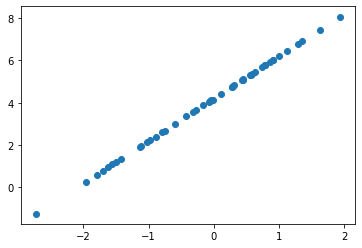

In [18]:
plt.scatter(X[0:50, 1],y[0:50])
plt.show()

#### 步骤2：定义模型

线性模型就是将输入和模型的参数（$\theta$）相乘：

$$\boldsymbol{h_\theta(X)} = X \boldsymbol{\theta}$$  即

$$\boldsymbol{h_\theta(X)} =  \boldsymbol{\theta_0} + X[1] \boldsymbol{\theta_1},其中(X[0]=1)$$ 

In [19]:
#定义模型函数，即h(x)
def net(X, theta):
    return np.dot(X, theta.T)

#### 步骤3：定义损失函数

我们使用常见的平方误差来衡量预测目标和真实目标之间的差距。

$$\frac{1}{2m}\sum_{i=1}^m (h_\theta(x_i)-y_i)^2.$$

In [20]:
def computeCost(h, y):
    cost = np.power((h - y), 2)
    return np.sum(cost)/(2*len(X))

#### 步骤4：梯度下降

虽然线性回归有显式解，但绝大部分模型并没有。所以我们这里通过随机梯度下降来求解。每一步，我们将模型参数沿着梯度的反方向走特定距离，这个距离一般叫**学习率（learning rate）** $\alpha$。

In [21]:
#********************************
#功能：
#  梯度下降算法
#params:
#  X-训练集
#  y-训练样本的标记
#  theta-模型参数
#  alpha-学习速率(learning rate)
#  iters-迭代次数
#returns:
#  返回求解后的模型参数theta
#********************************
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.zeros(theta.shape)
    cost = np.zeros(iters)  #记录每次得的损失
    #参数的个数，ravel()多维数组转为一维数组
    paraNum = int(np.ravel(theta).shape[0])
    
    #迭代求解参数
    for i in range(iters):
        #求得误差
        error = net(X, theta) - y
        #计算梯度
        for j in range(paraNum):
            term = error * X[:,j].reshape(error.shape)
            temp[0, j] = theta[0, j] - ((alpha / len(X))) * np.sum(term)
        
        #更新参数
        theta = temp
        #计算预测值
        h = net(X, theta)
        #计算损失CostJ
        loss = computeCost(h, y)
        costJ.append(loss)
        if (i + 1) % 100 == 0:
            print("Epoch %s. Moving loss: %s. theta0:%s, theta1:%s"  % (i, loss,theta[0][0],theta[0][1]))
            plot(costJ, X, theta)
    return theta

#### 步骤5：初始化模型

下面我们随机初始化模型参数

In [22]:
theta = np.array([[0,0]])

In [23]:
theta[0,0]

0

#### 步骤6：训练

现在我们可以开始训练了。训练通常需要迭代数据数次，在这里使用`iters`表示迭代总次数；一次迭代中，我们读所有的训练点，计算梯度并更新模型参数（批量梯度下降）。

In [24]:
# 模型函数
def real_fn(X):
    return 4.2 * X[:, 0] + 2 * X[:, 1]

# 绘制损失随训练次数降低的折线图，以及预测值和真实值的散点图
def plot(losses, X, theta):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:, 1],net(X, theta), 'or', label='Estimated')
    fg2.plot(X[:, 1],real_fn(X), '*g', label='Real')
    fg2.legend()
    plt.show()

Epoch 99. Moving loss: 1.468978999188409. theta0:2.6347370203237883, theta1:1.2741529169298849


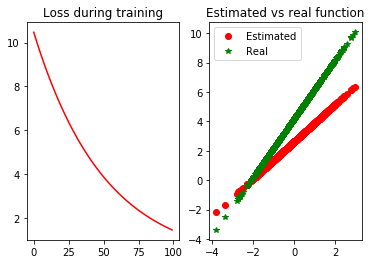

Epoch 199. Moving loss: 0.2021757183636518. theta0:3.6169805746649795, theta1:1.7359547743694101


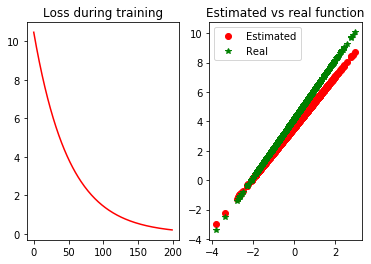

Epoch 299. Moving loss: 0.027871192448237905. theta0:3.9829881554061135, theta1:1.903697303575865


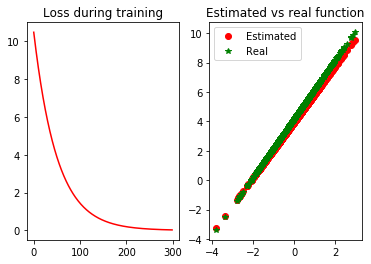

Epoch 399. Moving loss: 0.0038796589099060618. theta0:4.119312993916028, theta1:1.9647514350986706


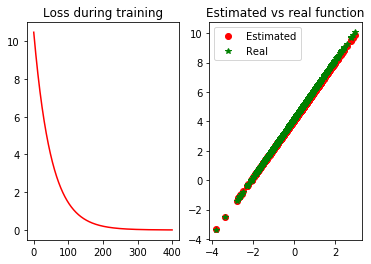

Epoch 499. Moving loss: 0.0005765277240328531. theta0:4.170069982627557, theta1:1.9870154723968654


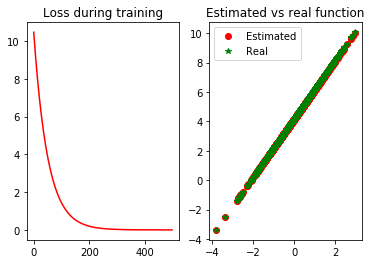

In [25]:
#初始化模型参数
theta = np.array([[0,0]])
alpha = 0.01
iters = 500
costJ = []
theta = gradientDescent(X, y, theta, alpha, iters)

#### 步骤7：绘制拟合曲线图与绘制训练误差图

In [26]:
#指定的间隔内返回均匀间隔的100个数字
x = np.linspace(X[:,1].min(), X[:,1].max(), 100)
#利用模型求得预测值
f = theta[0, 0] + (theta[0, 1] * x)

Text(0.5, 1.0, 'Sample Regression')

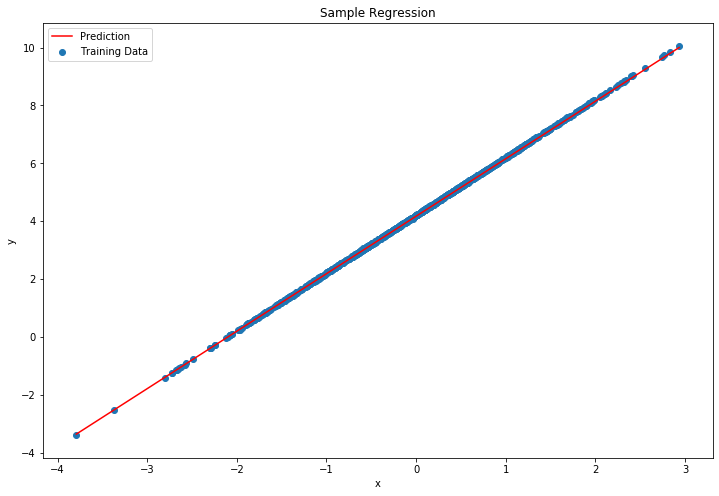

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r', label = 'Prediction')
ax.scatter(X[:,1],y,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel("x")
ax.set_ylabel('y')
ax.set_title('Sample Regression')

#### 绘制训练误差图

Text(0.5, 1.0, 'Error Vs. Training Epoch')

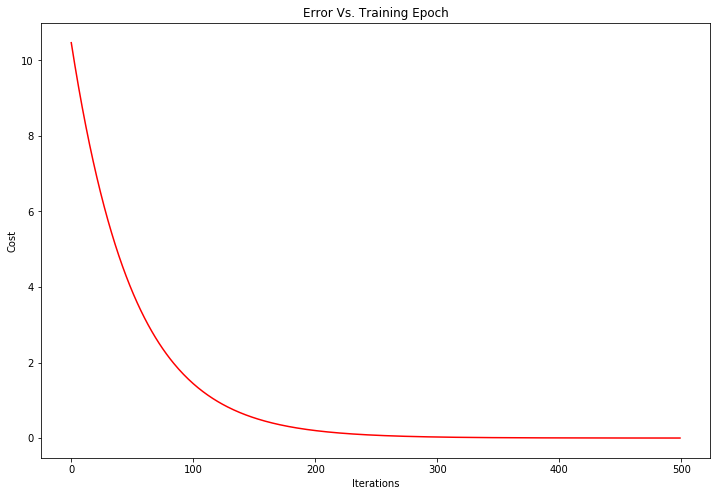

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), costJ, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs. Training Epoch')

训练完成后，我们可以比较学得的参数和真实参数

In [29]:
theta

array([[4.17006998, 1.98701547]])

In [31]:
true_theta

array([[4.2, 2. ]])

### 示例2：——新餐馆利润预测
如果你是一个餐馆的CEO，来预测一下一个新城市开的分店的利润。  
Note:数据来源于Andrew Ng 《Machine Learning》program exercise。

#### 步骤1：读取数据  
利用pandas包的read_csv方法来读取数据，并且利用head方法展示数据的几行

In [32]:
data = pd.read_csv('data/ex1data1.txt',header=None,
                   names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


可以利用describe函数对数据集做基本的统计分析

In [33]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


绘制数据集的散列图 

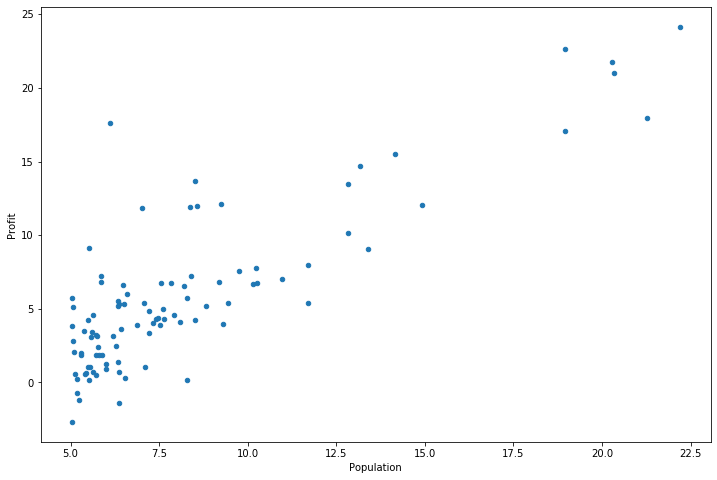

In [34]:
data.plot(kind='scatter', x='Population', y='Profit'
          , figsize=(12,8))

可视化可以直观的看到数据的分布情况，通过上图我们可以看到人数较少的数据聚集在一起，而当人数比较多的时候，利润有直线上涨的趋势。

#### 步骤2：实现线性回归

首先，定义代价函数，矩阵运算比for循环更有效率，所以需要利用numpy的矩阵运算。

In [35]:
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T) - y),2)
    return np.sum(inner) / (2 * len(X))

在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。同时将数据集划分成特征集X和对应的预测结果（依赖变量）y。利用pandas中的iloc函数来提取列。

In [36]:
data.insert(0,'Ones',1)
cols = data.shape[1]
#基于索引位来选取数据集
X = data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

将DataFrame数据转换成matrix,并且初始化参数theta

In [37]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [38]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [39]:
computeCost(X, y, theta)

32.072733877455676

定义批量梯度下降算法：

In [40]:
def gradientDecent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha /len(X)) * np.sum(term))
            
            theta = temp
            cost[i] = computeCost(X,y,theta)
    return theta, cost

#### 步骤4：训练模型
初始化学习速率和迭代次数，进行梯度下降求解

In [49]:
alpha = 0.01
iters = 1000
g, cost = gradientDecent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [50]:
computeCost(X,y,g)

4.515955503078912

#### 步骤5：绘制结果

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

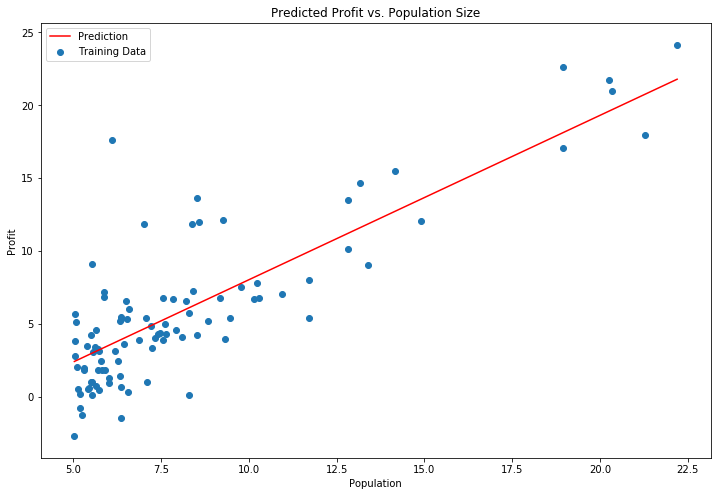

In [51]:
x = np.linspace(data.Population.min(), data.Population.max(),100)
f = g[0,0] + g[0,1] * x
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population, data.Profit, label = 'Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Not bad!绘制一下Error与迭代次数的可视化图，看看误差下降的情况：

Text(0.5, 1.0, 'Error vs. Training Epoch')

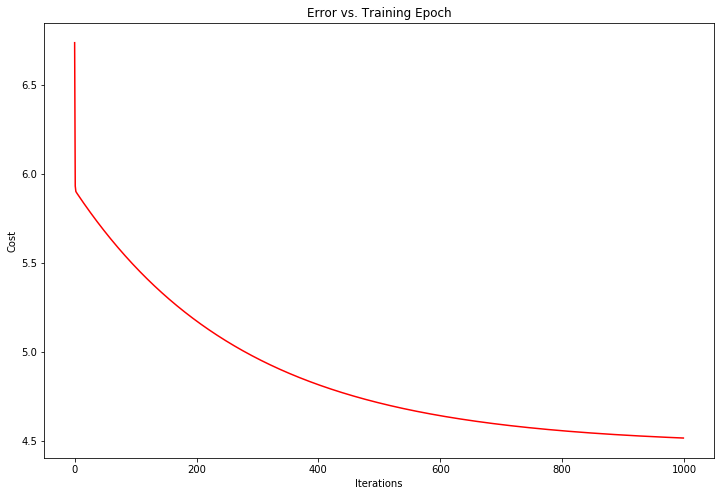

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## 结论


我们现在看到，使用梯度下降就可以很容易实现的一个模型。接下来我们会在此基础上，介绍更多机器学习的知识，以及如何实现这些算法。

## 练习

动手去实现单变量的线性回归算法啊，尝试用不同的学习率查看误差下降速度（收敛率）


## Next
1. 介绍多变量线性回归

2. 详细介绍多种梯度下降算法